2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading pressure =  0.2666855691394659
Component  1
	p =  0.6
	p^0 =  2.4007455232727004
	Loading:  0.06712949175761473
	x =  0.24992236544174784
	Spreading pressure =  0.2666855691394659
2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading pressure =  0.2666855691394659
Component  1
	p =  0.6
	p^0 =  2.4007455232727004
	Loading:  0.06712949175761473
	x =  0.24992236544174784
	Spreading pressure =  0.2666855691394659
2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading p

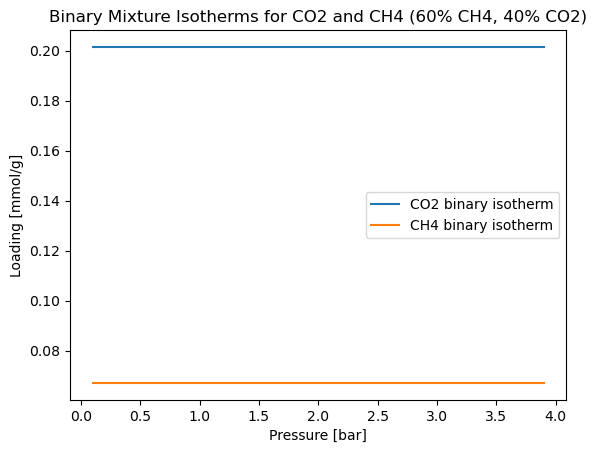

In [21]:
import pyiast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path_CH4 = '/Users/emmak/github/CH4_IRMOF1.csv'
file_path_CO2 = '/Users/emmak/github/CO2_IRMOF1.csv'
df_co2 = pd.read_csv(file_path_CO2)
df_ch4 = pd.read_csv(file_path_CH4)


ch4_isotherm = pyiast.InterpolatorIsotherm(df_ch4, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)")
co2_isotherm = pyiast.InterpolatorIsotherm(df_co2, loading_key="Loading(mmol/g)", pressure_key="Pressure(bar)")

pressures = np.arange(0.1, 4.1, 0.2)

y_co2 = 0.4
y_ch4 = 0.6

adsorption_co2 = []
adsorption_ch4 = []

for P in pressures:
    adsorbed_amounts = pyiast.iast([y_co2, y_ch4], [co2_isotherm, ch4_isotherm], P)
    adsorption_co2.append(adsorbed_amounts[0])
    adsorption_ch4.append(adsorbed_amounts[1])

plt.plot(pressures, adsorption_co2, label='CO2 binary isotherm')
plt.plot(pressures, adsorption_ch4, label='CH4 binary isotherm')
plt.xlabel('Pressure [bar]')
plt.ylabel('Loading [mmol/g]')
plt.legend()
plt.title('Binary Mixture Isotherms for CO2 and CH4 (60% CH4, 40% CO2)')
plt.show()

In [20]:
# Pressures for selectivity calculation
selectivity_pressures = [0.1, 1, 2, 3]

# List to store selectivity values
selectivities = []

# Calculate selectivity at specific pressures
for P in selectivity_pressures:
    adsorbed_amounts = pyiast.iast([y_co2, y_ch4], [co2_isotherm, ch4_isotherm], P)
    q_co2 = adsorbed_amounts[0]
    q_ch4 = adsorbed_amounts[1]
    selectivity = (q_co2 / q_ch4) / (y_co2 / y_ch4)
    selectivities.append(selectivity)

# Display selectivity results at different pressures
print("\nSelectivity of CO2 over CH4 at different pressures:")
for i, P in enumerate(selectivity_pressures):
    print(f"At {P} bar: Selectivity = {selectivities[i]:.2f}")

2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading pressure =  0.2666855691394659
Component  1
	p =  0.6
	p^0 =  2.4007455232727004
	Loading:  0.06712949175761473
	x =  0.24992236544174784
	Spreading pressure =  0.2666855691394659
2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading pressure =  0.2666855691394659
Component  1
	p =  0.6
	p^0 =  2.4007455232727004
	Loading:  0.06712949175761473
	x =  0.24992236544174784
	Spreading pressure =  0.2666855691394659
2 components.
	Partial pressure component 0 = 0.400000
	Partial pressure component 1 = 0.600000
Component  0
	p =  0.4
	p^0 =  0.5332781322503697
	Loading:  0.20147188627016066
	x =  0.7500776345582522
	Spreading p

In [18]:
# Prove selectivity doesn’t change when y_CO2 drops to 0.2 (20% CO2, 80% CH4)
y_co2_new = 0.2
y_ch4_new = 0.8
selectivities_new = []

for P in selectivity_pressures:
    adsorbed_amounts = pyiast.iast([y_co2_new, y_ch4_new], [co2_isotherm, ch4_isotherm], P)
    q_co2 = adsorbed_amounts[0]
    q_ch4 = adsorbed_amounts[1]
    selectivity_new = (q_co2 / q_ch4) / (y_co2_new / y_ch4_new)
    selectivities_new.append(selectivity_new)

# Display new selectivity results when y_CO2 = 0.2
print("\nSelectivity with y_CO2 = 0.2 and y_CH4 = 0.8:")
for i, P in enumerate(selectivity_pressures):
    print(f"At {P} bar: Selectivity = {selectivities_new[i]:.2f}")


2 components.
	Partial pressure component 0 = 0.200000
	Partial pressure component 1 = 0.800000
Component  0
	p =  0.2
	p^0 =  0.37732535917406573
	Loading:  0.10081699992628285
	x =  0.5300465371259001
	Spreading pressure =  0.18821076742642429
Component  1
	p =  0.8
	p^0 =  1.7022962127088728
	Loading:  0.08938705361389929
	x =  0.4699534628740999
	Spreading pressure =  0.18821076742642426
2 components.
	Partial pressure component 0 = 0.200000
	Partial pressure component 1 = 0.800000
Component  0
	p =  0.2
	p^0 =  0.37732535917406573
	Loading:  0.10081699992628285
	x =  0.5300465371259001
	Spreading pressure =  0.18821076742642429
Component  1
	p =  0.8
	p^0 =  1.7022962127088728
	Loading:  0.08938705361389929
	x =  0.4699534628740999
	Spreading pressure =  0.18821076742642426
2 components.
	Partial pressure component 0 = 0.200000
	Partial pressure component 1 = 0.800000
Component  0
	p =  0.2
	p^0 =  0.37732535917406573
	Loading:  0.10081699992628285
	x =  0.5300465371259001
	Spread